In [8]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [9]:
dataset_name = 'cardiotocography1'
shapes = {
    'S': (18,16,13),
    'V2': (10,),
    'V3': (8,),
    'V4': (6,),
    'V5': (5,)
}
epochs = 50
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([21], [10])


### S(X,X,X)

Average elapsed k-fold validation time: 40.40276 sec
Last measures: [0.09069256484508514, 0.08473141491413116, 0.059806738048791885, 0.056756578385829926, 0.09180600941181183, 0.07991255819797516, 0.08633746206760406, 0.09037242084741592, 0.07260012626647949, 0.039501432329416275, 0.07825657725334167, 0.07429521530866623, 0.05818435549736023, 0.05727419629693031, 0.050678376108407974, 0.07865417003631592, 0.0837821215391159, 0.06068361550569534, 0.06758586317300797, 0.04768957570195198, 0.06300956755876541, 0.0760202631354332, 0.09498735517263412, 0.09349928051233292, 0.0820266604423523, 0.09414806216955185, 0.07506564259529114, 0.083758644759655, 0.05188748985528946, 0.08053615689277649]
Loss history average: [0.09563063 0.09256184 0.09152165 0.09072738 0.08969131 0.08841418
 0.08704603 0.08565952 0.08411542 0.08284607 0.08191857 0.08105165
 0.08027525 0.07963626 0.07908787 0.07861102 0.07815747 0.07768921
 0.07714962 0.07648635 0.07594133 0.0754156  0.07489386 0.07439032
 0.07393449 

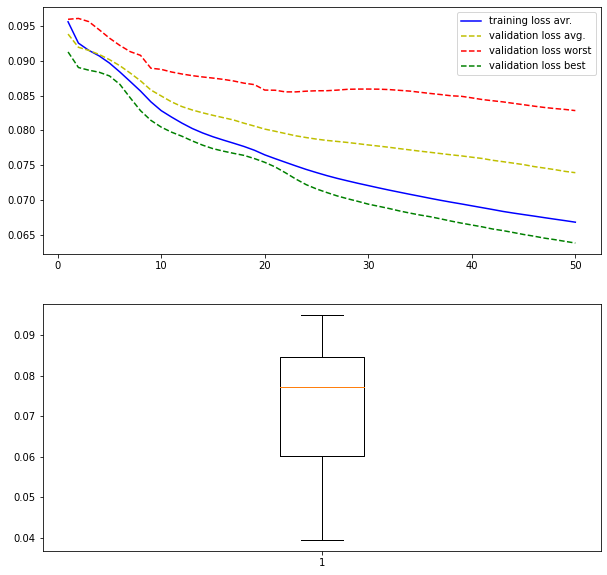

In [3]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 50.58805 sec
Last measures: [0.07971835881471634, 0.08601240068674088, 0.06454462558031082, 0.07814370840787888, 0.06699525564908981, 0.07948470115661621, 0.06485230475664139, 0.05529971420764923, 0.06262893974781036, 0.060792773962020874, 0.0754547119140625, 0.08063836395740509, 0.08065689355134964, 0.06850160658359528, 0.0792534127831459, 0.08847466856241226, 0.07239165902137756, 0.09404180198907852, 0.06585093587636948, 0.06625816226005554, 0.0974998027086258, 0.09680376946926117, 0.07265578955411911, 0.05070936307311058, 0.07561547309160233, 0.064820297062397, 0.07991930097341537, 0.07630617916584015, 0.06714008748531342, 0.08878087997436523]
Loss history average: [0.09645462 0.09465552 0.09378462 0.09340069 0.09319219 0.09295133
 0.09255277 0.09192978 0.09105568 0.08997706 0.08876144 0.08750393
 0.08628519 0.08518875 0.08421068 0.08336327 0.0826112  0.08195206
 0.08135579 0.0808219  0.08034105 0.07989687 0.0794807  0.07908974
 0.07872008 0.0

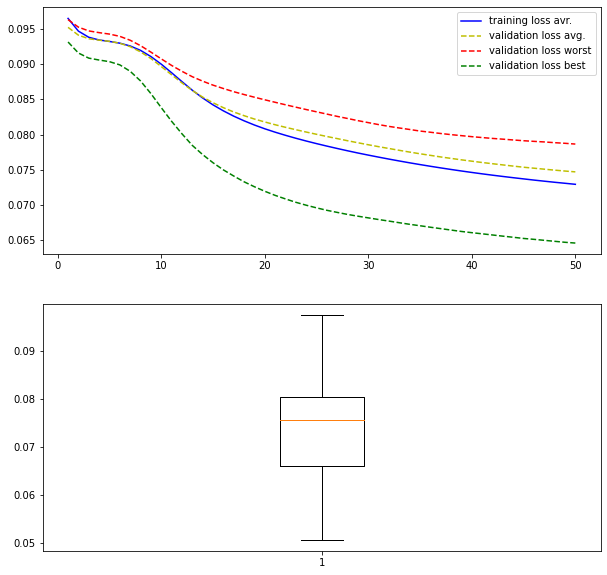

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 64.03581 sec
Last measures: [0.09236232191324234, 0.08069851249456406, 0.090221107006073, 0.049794308841228485, 0.08128844946622849, 0.08707819133996964, 0.07516685873270035, 0.05696733295917511, 0.05057262256741524, 0.07019210606813431, 0.0771457701921463, 0.08928024023771286, 0.06466779857873917, 0.06909484416246414, 0.05373174697160721, 0.08195597678422928, 0.07051876932382584, 0.06777939945459366, 0.0952647253870964, 0.04812195152044296, 0.08160562813282013, 0.07924458384513855, 0.06938894093036652, 0.08903483301401138, 0.06593053787946701, 0.08043696731328964, 0.09531445801258087, 0.0775952860713005, 0.07393554598093033, 0.08672131597995758]
Loss history average: [0.0954215  0.09315535 0.09182337 0.0912042  0.09090691 0.09075956
 0.09055455 0.090328   0.09002853 0.08953452 0.08885936 0.08807804
 0.08711641 0.08601462 0.08472511 0.08344332 0.08220983 0.08105515
 0.07995034 0.0789915  0.07816681 0.07741614 0.0766863  0.07602009
 0.07547719 0.0

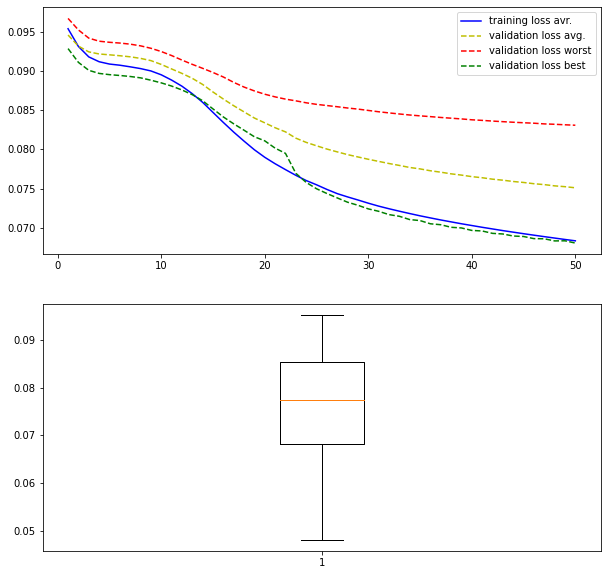

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 51.74971 sec
Last measures: [0.08036071062088013, 0.08524564653635025, 0.08925971388816833, 0.043379686772823334, 0.0908825695514679, 0.08855195343494415, 0.0793844535946846, 0.06384899467229843, 0.07674390822649002, 0.07254500687122345, 0.08005092293024063, 0.07480818778276443, 0.07917642593383789, 0.045907724648714066, 0.04101603478193283, 0.08957726508378983, 0.09575505554676056, 0.06238320842385292, 0.03985225781798363, 0.048293985426425934, 0.08519947528839111, 0.09519468992948532, 0.08863738924264908, 0.06678338348865509, 0.06478134542703629, 0.08313712477684021, 0.0727827250957489, 0.0634894147515297, 0.0423724427819252, 0.08567734807729721]
Loss history average: [0.0964542  0.09445239 0.09334958 0.09281513 0.09253892 0.0922588
 0.09179807 0.09103579 0.08993949 0.08855809 0.08702501 0.08553677
 0.08417315 0.08297165 0.08194172 0.08105609 0.08028605 0.0796025
 0.07899063 0.07843176 0.07790831 0.07741413 0.07693784 0.07647062
 0.07601406 0.0

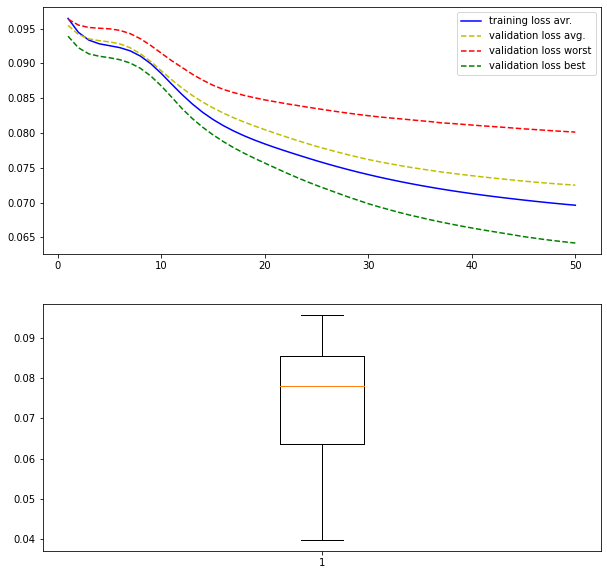

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 68.70947 sec
Last measures: [0.0653872862458229, 0.08485174179077148, 0.07504016160964966, 0.05604580044746399, 0.05798114463686943, 0.07961784303188324, 0.072820745408535, 0.07231849431991577, 0.06557459384202957, 0.08815210312604904, 0.0696021169424057, 0.07959897816181183, 0.08213412761688232, 0.0741921067237854, 0.07199078798294067, 0.08113851398229599, 0.07632340490818024, 0.05150501802563667, 0.07695221900939941, 0.06877533346414566, 0.08594128489494324, 0.08047544956207275, 0.07472719252109528, 0.0958043560385704, 0.07736728340387344, 0.0672273188829422, 0.07305105030536652, 0.05669286102056503, 0.0680939108133316, 0.058168139308691025]
Loss history average: [0.09566103 0.09358422 0.09238363 0.09175331 0.09144945 0.09108104
 0.09077169 0.09017982 0.0893414  0.08854117 0.08745222 0.0861882
 0.08485208 0.08351407 0.08209678 0.0808508  0.07972674 0.07869826
 0.07778527 0.07693577 0.07622998 0.07559376 0.07501521 0.07449519
 0.07399744 0.07352

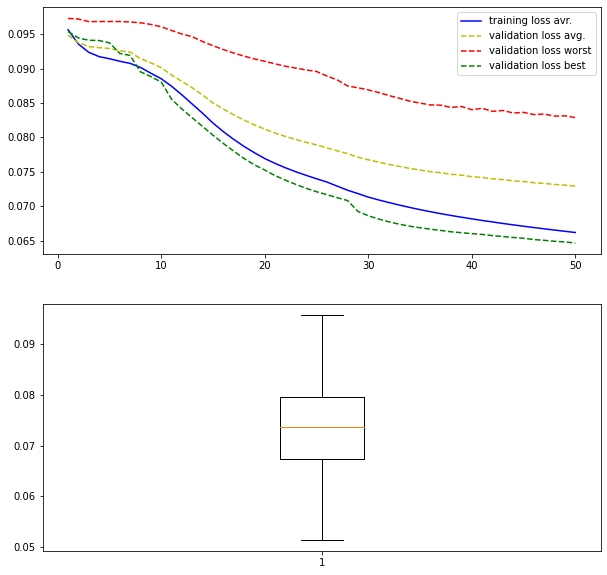

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 69.02691 sec
Last measures: [0.09621284157037735, 0.08968821167945862, 0.04923331364989281, 0.07384894788265228, 0.054089952260255814, 0.07813405990600586, 0.07673019170761108, 0.08790072053670883, 0.07652222365140915, 0.06647162139415741, 0.09241428971290588, 0.08969532698392868, 0.0826994925737381, 0.05260056257247925, 0.09232722222805023, 0.06403890997171402, 0.08127355575561523, 0.08032727986574173, 0.05061737820506096, 0.08876354992389679, 0.06446307897567749, 0.06766495853662491, 0.06440308690071106, 0.04522544890642166, 0.09266424179077148, 0.07533042132854462, 0.0776556134223938, 0.04487394168972969, 0.09314222633838654, 0.05757569521665573]
Loss history average: [0.09638459 0.09436364 0.09320786 0.09256802 0.09218678 0.09180106
 0.09122466 0.09033764 0.089159   0.08776999 0.08634164 0.08496296
 0.08372353 0.08263981 0.08166108 0.08081969 0.08005134 0.07934186
 0.07869778 0.07812545 0.07761524 0.07715895 0.0767274  0.07633094
 0.07595084 

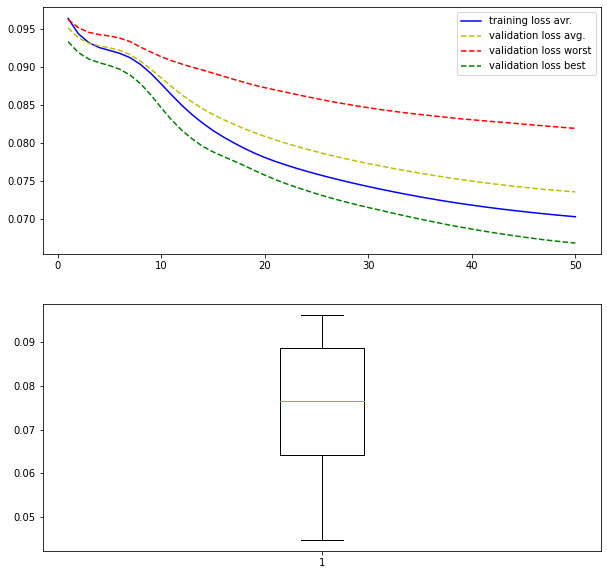

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 63.43823 sec
Last measures: [0.0901590958237648, 0.08747944235801697, 0.09918089210987091, 0.07220741361379623, 0.07289256155490875, 0.07213279604911804, 0.08756008744239807, 0.050236888229846954, 0.06829600781202316, 0.08180030435323715, 0.07131946086883545, 0.0775662213563919, 0.04943299666047096, 0.062020350247621536, 0.0620381198823452, 0.06877606362104416, 0.07547234743833542, 0.08314408361911774, 0.07059621810913086, 0.08764074742794037, 0.09667640924453735, 0.07241721451282501, 0.09320089221000671, 0.06306618452072144, 0.0852944552898407, 0.07874667644500732, 0.0649677962064743, 0.09883297234773636, 0.08227928727865219, 0.09258013218641281]
Loss history average: [0.09619702 0.09430886 0.09299349 0.0922125  0.09189334 0.09170166
 0.09139927 0.09101392 0.09046462 0.08962305 0.0887135  0.08763499
 0.08651402 0.08512424 0.08367868 0.08253023 0.08150995 0.08031675
 0.07920609 0.07829901 0.07754761 0.07688044 0.076288   0.0757544
 0.07523984 0.0

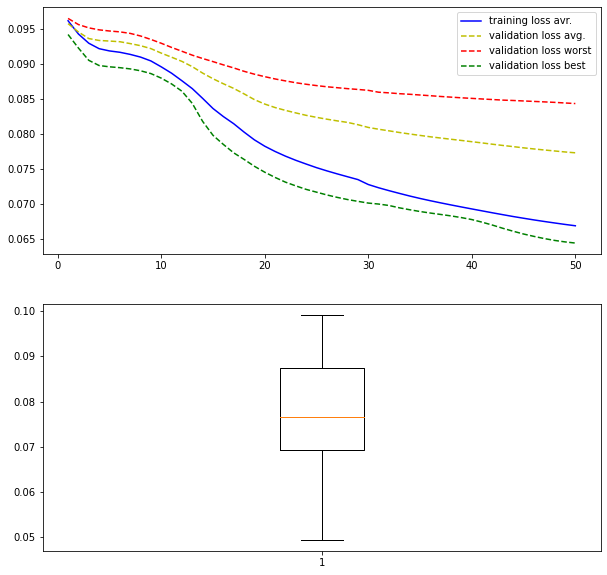

In [15]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(5)

Average elapsed k-fold validation time: 54.09936 sec
Last measures: [0.06948874145746231, 0.07289692759513855, 0.08769779652357101, 0.07412702590227127, 0.09911017119884491, 0.09352639317512512, 0.0800366923213005, 0.07998162508010864, 0.07564272731542587, 0.0569550022482872, 0.0651080533862114, 0.08569126576185226, 0.04907018318772316, 0.08986207097768784, 0.05592947453260422, 0.06817401945590973, 0.07469289749860764, 0.045672159641981125, 0.06599880754947662, 0.06322462856769562, 0.07988163828849792, 0.06736042350530624, 0.046555645763874054, 0.05347418412566185, 0.08931630104780197, 0.09569736570119858, 0.07427048683166504, 0.07228045910596848, 0.07462415099143982, 0.056471195071935654]
Loss history average: [0.09592134 0.09361702 0.09215752 0.09131313 0.09081025 0.09026144
 0.08944183 0.08826574 0.08679816 0.0851499  0.08351824 0.08203246
 0.08074958 0.07964977 0.07869581 0.07786056 0.07709309 0.0764118
 0.07578854 0.07522251 0.07469093 0.07419483 0.07372947 0.07328927
 0.07287889 

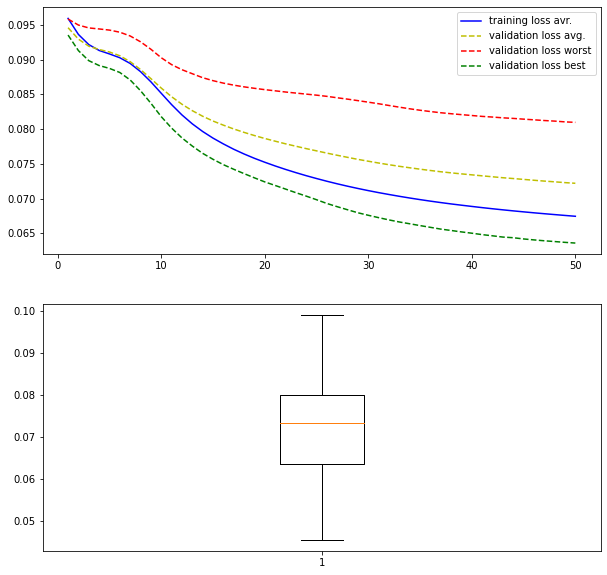

In [16]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(5)

Average elapsed k-fold validation time: 120.32642 sec
Last measures: [0.07938703894615173, 0.07933104038238525, 0.04289722070097923, 0.07515887916088104, 0.07520299404859543, 0.08164674788713455, 0.06185586005449295, 0.07912908494472504, 0.06580494344234467, 0.07573401182889938, 0.06686150282621384, 0.09970053285360336, 0.06319703906774521, 0.0721781849861145, 0.06122364103794098, 0.07932732254266739, 0.06618854403495789, 0.08052971959114075, 0.054781924933195114, 0.07202176004648209, 0.07973568886518478, 0.0819934606552124, 0.06408780813217163, 0.04597178474068642, 0.04967606067657471, 0.07744891196489334, 0.09667398780584335, 0.054349929094314575, 0.05699227377772331, 0.07488016784191132]
Loss history average: [0.09640042 0.09460914 0.09337518 0.09264208 0.09219566 0.09197591
 0.09178626 0.09150934 0.09108086 0.09050075 0.0895259  0.088349
 0.08679888 0.08533956 0.08403382 0.08269807 0.08131623 0.0798233
 0.07864072 0.07764422 0.07674945 0.07592808 0.07519858 0.07450695
 0.07384951 0

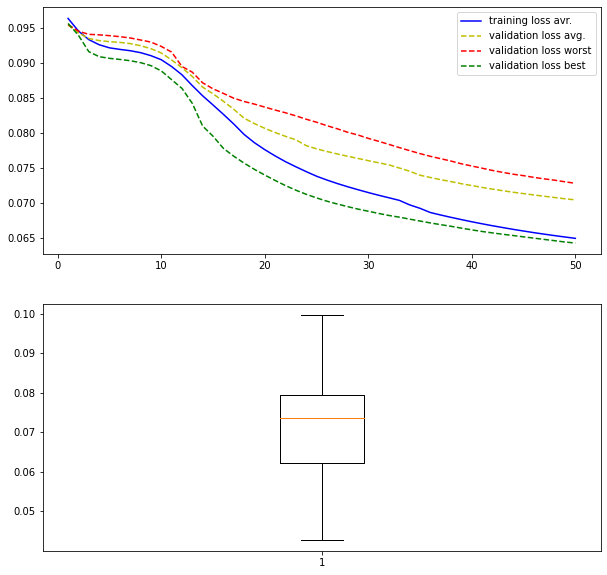

In [17]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)